In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deeplearning/Employee.csv")

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for name in df.columns:
    df[name] = le.fit_transform(df[name])
    df[name].fillna(int(df[name].median()), inplace=True)

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,12,1,0,0,0
1,0,1,2,0,6,0,0,3,1
2,0,2,1,2,16,0,0,2,0
3,1,4,0,2,5,1,0,5,1
4,1,5,2,2,2,1,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


In [ ]:
target = df.pop('LeaveOrNot')
features = df


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
features = mm.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split


x,x_test,y,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)

features.shape

(4653, 8)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
activation ='relu'
model.add(keras.layers.Flatten(input_shape=[8]))
model.add(keras.layers.Dense(400,activation=activation))
model.add(keras.layers.Dense(200,activation=activation))
model.add(keras.layers.Dense(100,activation=activation))
model.add(keras.layers.Dense(50,activation=activation))
model.add(keras.layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 400)               3600      
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 4)                 204       
                                                                 
Total params: 109154 (426.38 KB)
Trainable params: 10915

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=20 )

Epoch 1/20
94/94 [==============================] - 2s 7ms/step - loss: 0.6321 - accuracy: 0.6906 - val_loss: 0.5293 - val_accuracy: 0.7490
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.7427 - val_loss: 0.5177 - val_accuracy: 0.7611
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.7319 - val_loss: 0.5005 - val_accuracy: 0.7745
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 0.4941 - accuracy: 0.7719 - val_loss: 0.4920 - val_accuracy: 0.7785
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.7894 - val_loss: 0.6144 - val_accuracy: 0.6698
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7820 - val_loss: 0.4673 - val_accuracy: 0.7960
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.8052 - val_loss: 0.4525 - val_accuracy: 0.8094
Epoch 8/20
94/94 [==

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

30/30 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Accuracy: 0.8646616541353384
precision: 0.8793774319066148
recall: 0.7040498442367601


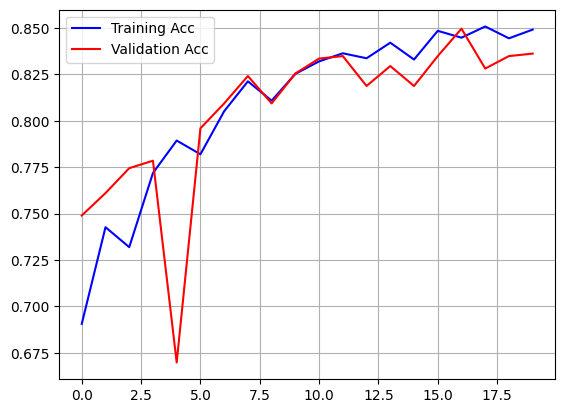

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.grid()
plt.legend(['Training Acc','Validation Acc'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")